# Regression Exercise
Using Regression to predict wine quality.

## Import Our Libraries

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns
sns.set()
# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# IMPORT OUR LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR MODEL
from sklearn.ensemble import RandomForestRegressor


# IM LEAVING THERES HERE BECAUSE IM NICE
# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stats

%matplotlib inline

# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/winequality-white.csv`

In [2]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/winequality-red.csv')

# DISPLAY THE FIRST 5 ROWS
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5


# Inspect our data using `df.describe()` function.

In [3]:
# Inspect our data using `df.describe()` function.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000,14.900000,8.000000


# Check for Nulls.

In [4]:
# Check for Nulls.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Check for Duplicates

In [5]:
# Check for Duplicates
df.duplicated().sum()


240

In [6]:
# Remove duplicates
print(df.shape)


# REMOVE DUPLICATES HERE
df = df.drop_duplicates()
# Sanity check
print(df.shape)

(1599, 11)
(1359, 11)


# Visualize our data to discover outliers.
* Use `sns.pariplot`

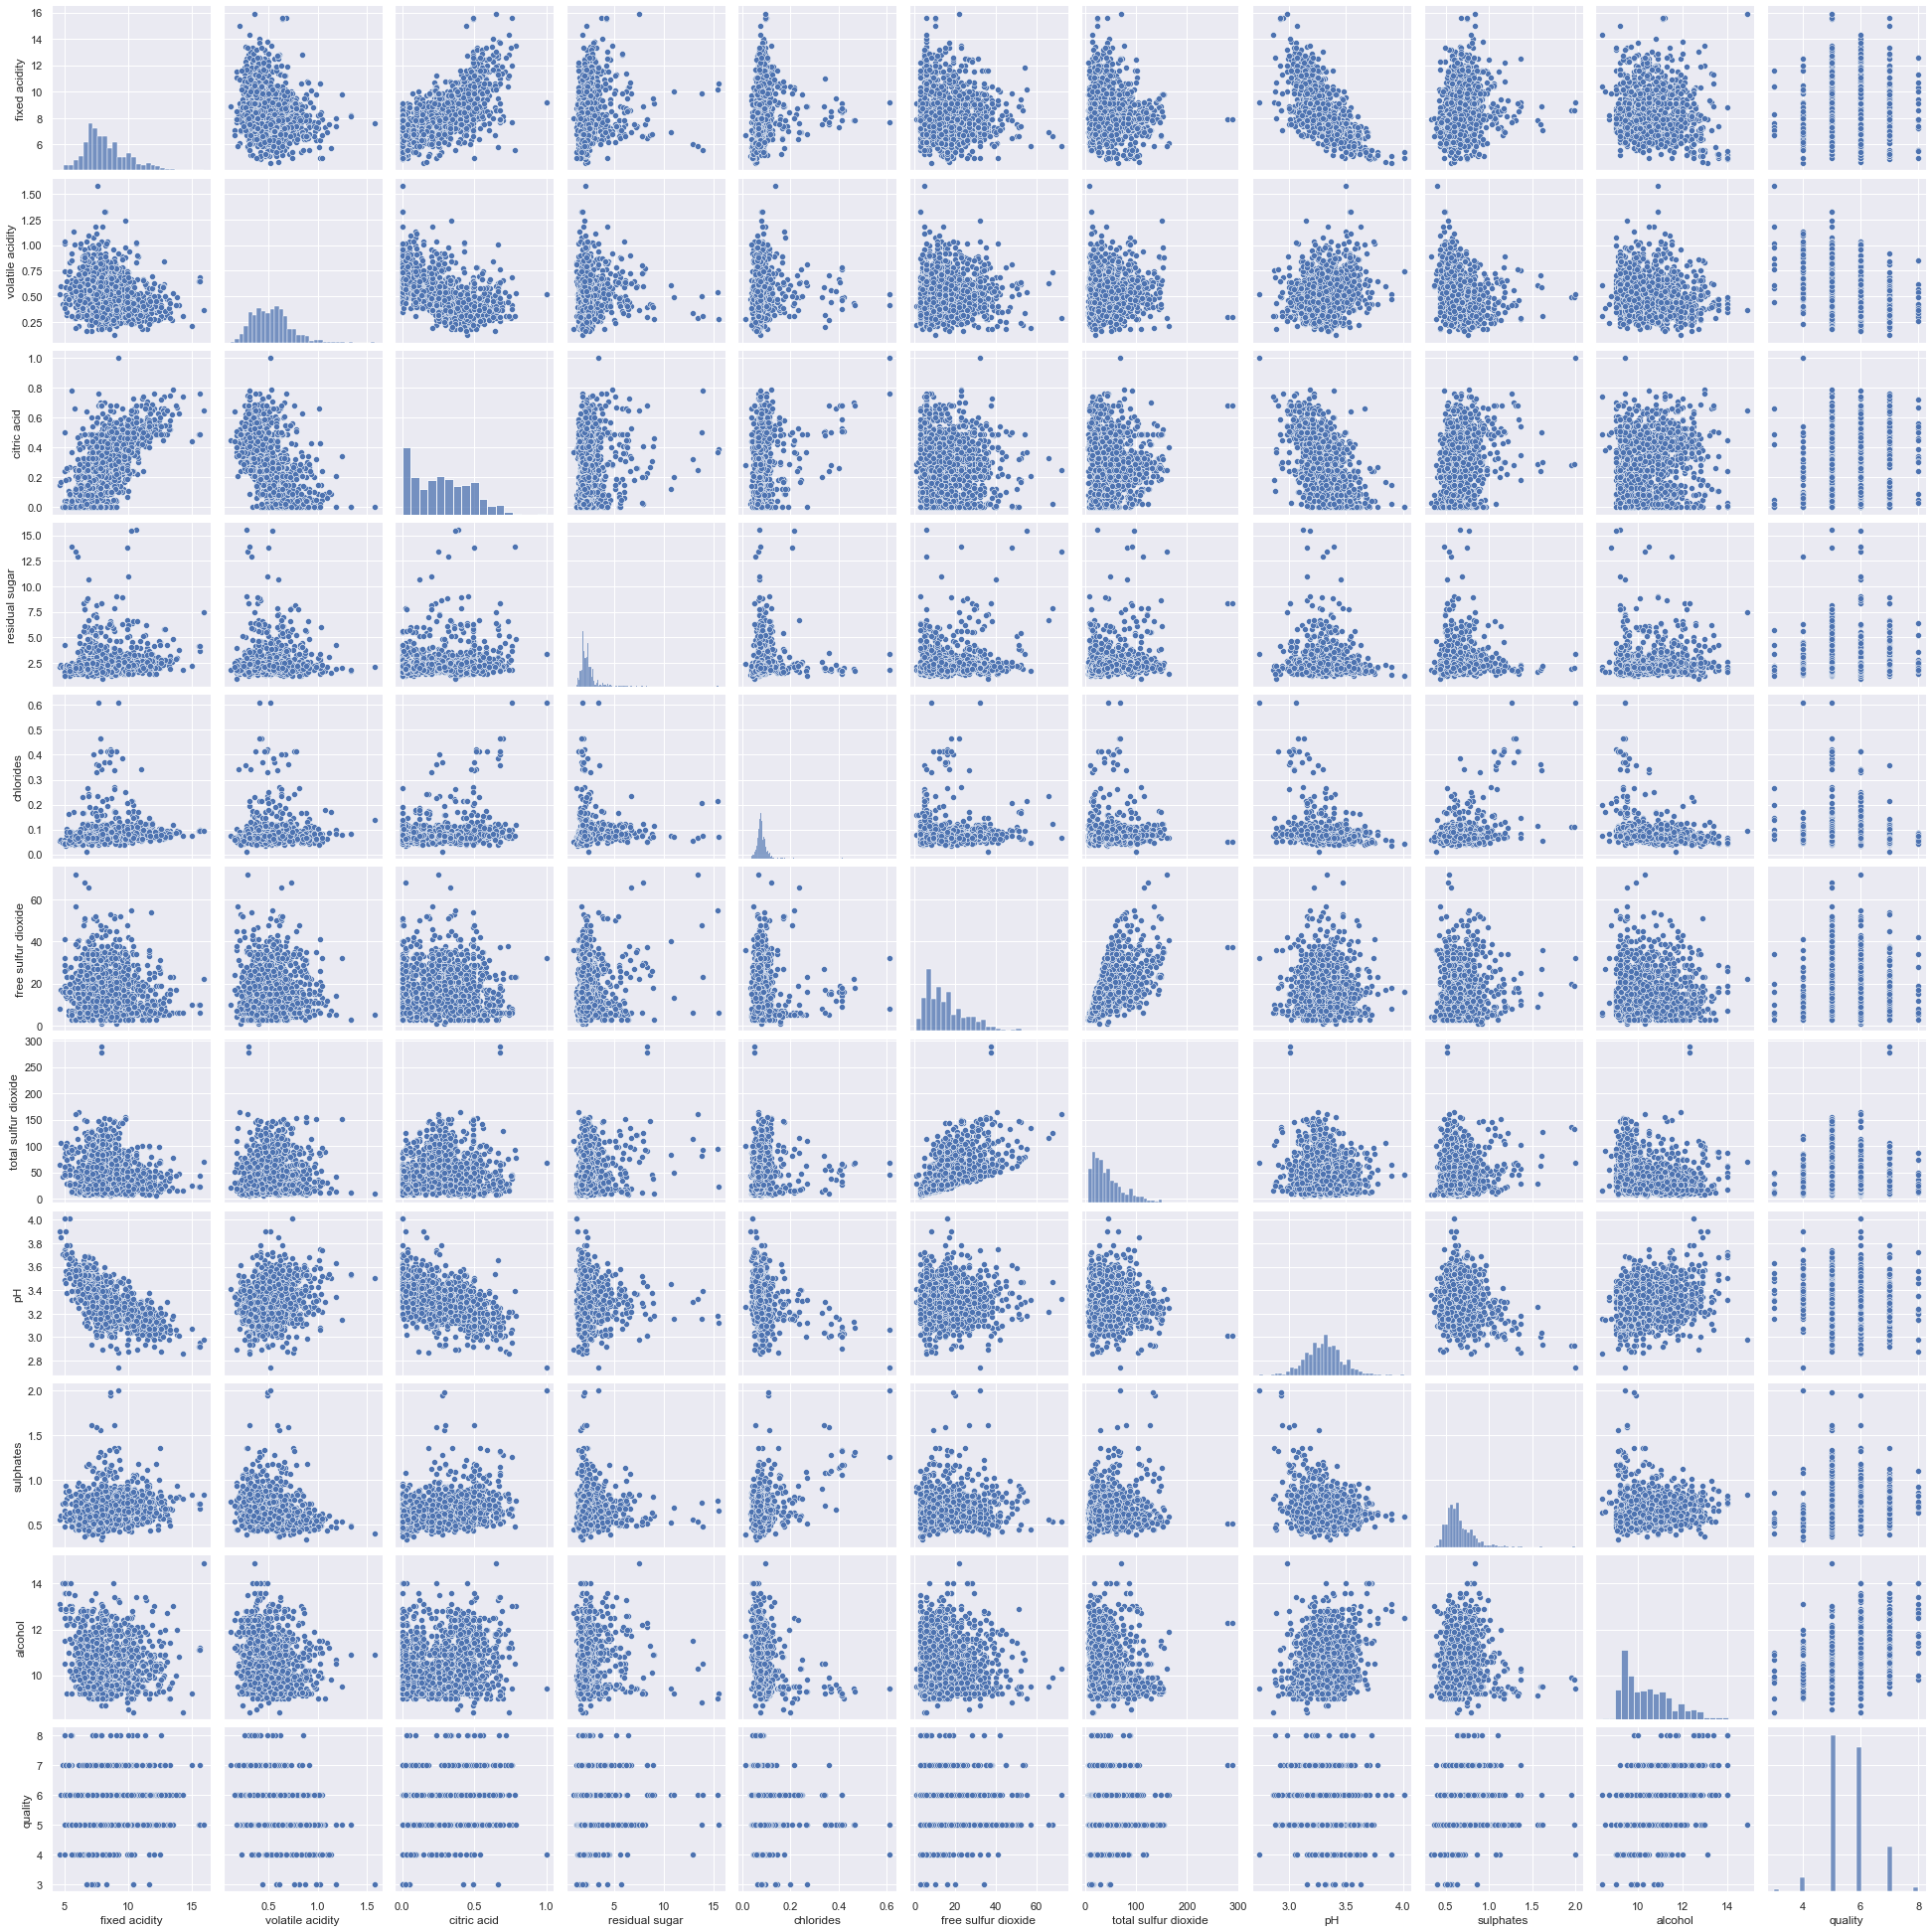

In [8]:
# Visualize our data to discover outliers.
sns.pairplot(data=df)

___
# STEP 2  (s):  Select and Engineer Features

# Remove outliers
* Make sure you DO NOT remove outliers from our target variable of `quality`.

In [9]:
# Keep this for later
original_cols = df.columns

# Set the columns you want to remove outliers for
target_cols = ['total sulfur dioxide', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'pH',
       'sulphates', 'alcohol']

# Make a new list that is going to contain our z-score
z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_col_name = col + "_zscore"
    
    # Set the new column equal to the score
    df[new_col_name] = stats.stats.zscore( df[col] )
    
    # Set the z-score to its absolute value of the for easier filtering
    df[new_col_name] = abs( df[new_col_name] )
    
    # Append the new column name our our z_score_cols list for easier access for later.
    z_score_cols.append(new_col_name)


condition = df[z_score_cols] < 3

# Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

# Apply our condition to our dataframe and replace our current dataframe with the applied condition.
df = df[condition]

print('After removal of outliers', df.shape)

Before removal of outliers (1359, 21)
After removal of outliers (1243, 21)


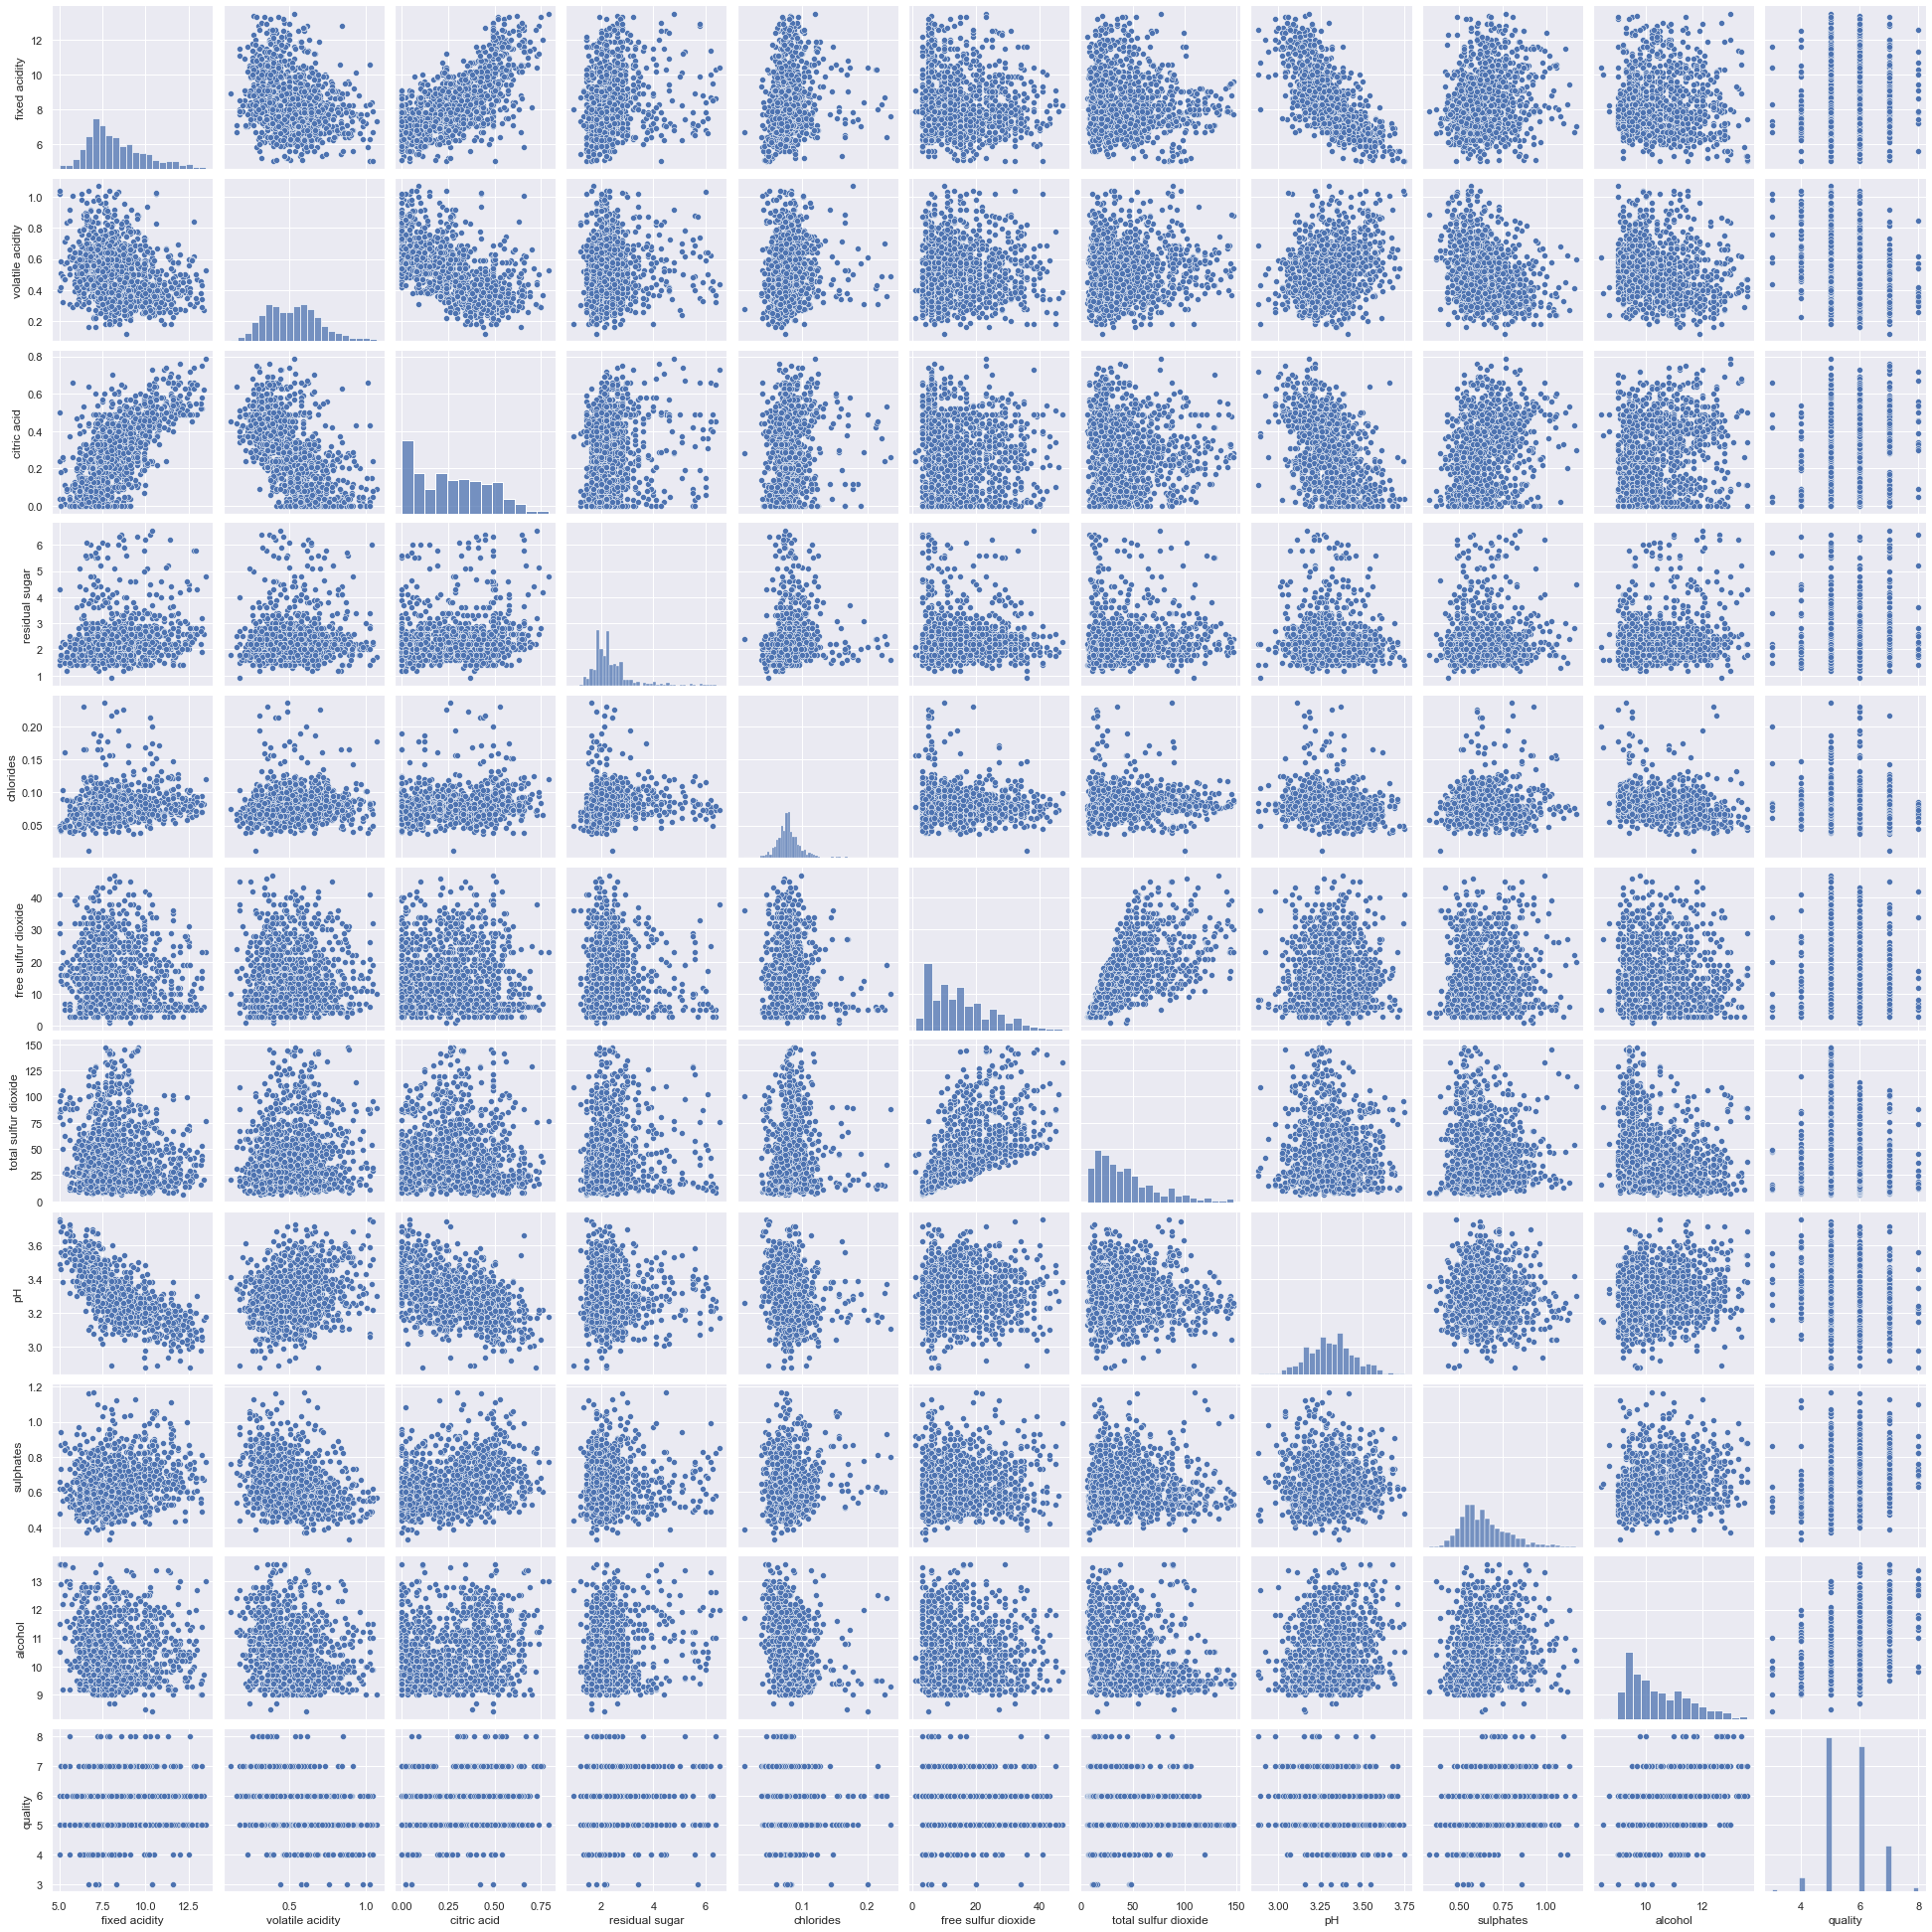

In [10]:
# Keep only original columns
df = df[original_cols]

# Visualize using sns.pairplot again to see if outliers were removed. 
sns.pairplot(df)

# Find which features have a linear relationship with quality.
* Plot below the linear relationship between each variable against quality.
* Use `sns.relplot`

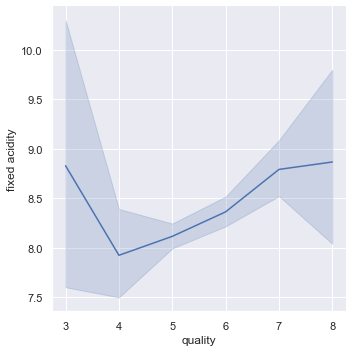

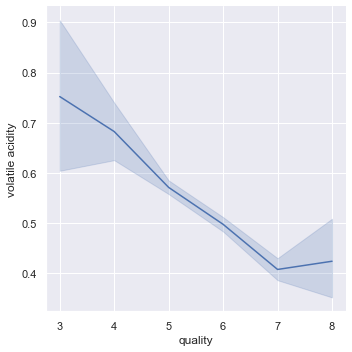

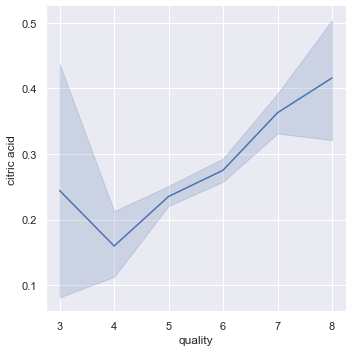

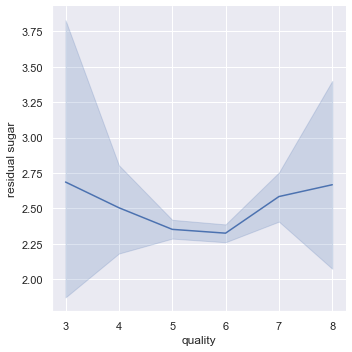

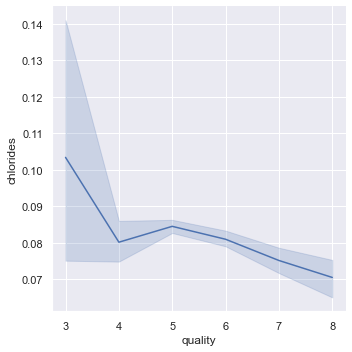

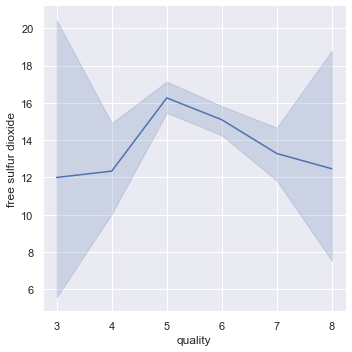

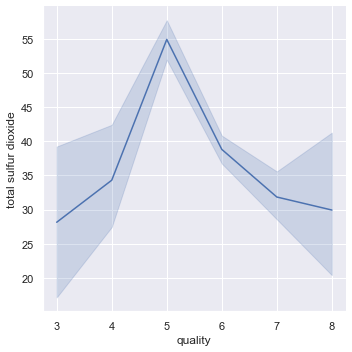

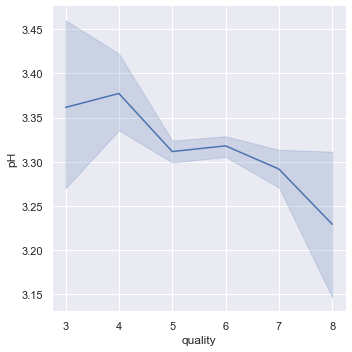

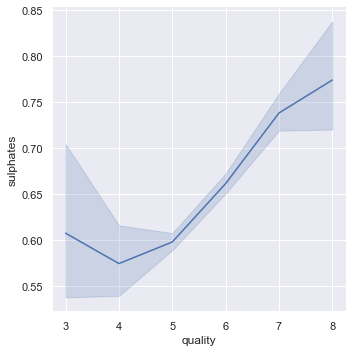

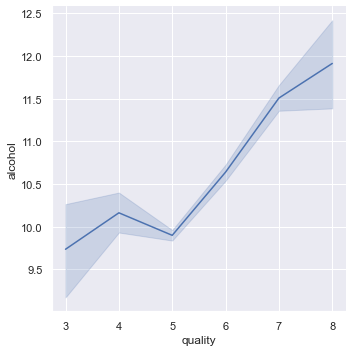

In [11]:
# Plot below the linear relationship between each variable against quality

all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# YOURE GOING TO NEED TO USE A LOOP
for feature in all_features:
    sns.relplot(data = df, y = feature, x = 'quality', kind='line', height=5, aspect=1)

# Select your predictor features and your target variable.
1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
2. Define your `X` and `y` variables
3. Split our data into a training set and a testing set.

In [15]:
# 1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid',
               'chlorides',  'pH', 'sulphates', 'alcohol']

In [16]:
# Define your X and y variables
X = df[selected_features].values


# 
y = df['quality'].values

In [17]:
# 3. Split our data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

___
# STEP 3 (b): Build and train our model
1. Initialize our Linear Regression model.
2. Use our training data to fit aka train our model.


In [18]:
# 1. Initialize our Linear Regression model.

model = LinearRegression()

In [19]:
# 2. Use our training data to fit aka train our model.
model.fit(X_train, y_train)

LinearRegression()

___
# STEP 4 (e): Evaluate model.
1. Make new predicitions using our testing data.
2. Calculate R-Squared and Mean Absolute Error socres

In [20]:
# 1. Make new predicitions using our testing data.
y_pred = model.predict(X_test)
y_pred

array([5.32785783, 5.76689735, 5.10267333, 5.18849735, 5.44904752,
       5.41178405, 6.46227606, 5.15593618, 6.39605909, 5.47745812,
       6.28712031, 5.8357742 , 6.36877003, 6.00144315, 4.98281453,
       5.38427972, 5.43475492, 5.49491437, 5.38640266, 5.03585894,
       5.41625451, 5.5468207 , 5.4685354 , 6.29043496, 6.17237257,
       5.19350105, 5.83823216, 4.91158793, 5.10555481, 6.40840069,
       6.64684422, 6.10950501, 6.15299037, 6.31460984, 5.21160654,
       5.52801589, 5.13963186, 5.9774484 , 6.54806373, 6.44366026,
       5.6185564 , 5.18145172, 6.50253523, 5.78260332, 5.21590587,
       5.23318704, 5.43531634, 5.70918887, 6.14381496, 6.46742595,
       5.34618224, 5.5895761 , 4.80975457, 5.22167202, 4.98684184,
       6.43592647, 5.84539819, 5.10339184, 6.05279528, 6.25626087,
       5.24808361, 5.16763825, 4.9667809 , 5.89906031, 5.14008385,
       5.07904283, 6.03214901, 5.58002457, 5.92261702, 6.32438502,
       5.52017842, 5.35173063, 6.4104345 , 5.21596107, 5.38727

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model. 
* How well the trendline explains the variance of the data. 
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember for human labeled data like the quality of wine, .3 is pretty good.

In [21]:
# 2. Calculate R-Squared and Mean Absolute Error socres

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.37267183563793205
Mean Absolute Error: 0.5553780169689863


# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [ ]:
import pickle

# NAME YOUR MODEL 
filename = 'white-wine-model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(model, open(filename, 'wb'))

___
# Random Forest Regression

Without step by step guidance, in the cell below, build a Random Forest Regression model and compare the r-squared and mean absolute error scores to the Linear Regression model.
* Dont forget, Random Forest can handle non-linear features!

* When splitting your data, make sure to use the same random state as you did for your Linear Regression model
    * `train_test_split(???, random_state=1)`

* Dont forget about `GridSearchCV` from our last lecture :) 

1. Which model proved to have better scores.
2. Why do you think that is...?


In [22]:
# Do complete Random Forest Regression model here...
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol']
X = df[features].values
y = df['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
#

R-Squared Score: 0.4319454349360733
Mean Absolute Error: 0.5209638554216868


In [23]:
# 1. Which model proved to have better scores.


print('Random forest had better scores')

Random forest had better scores


In [24]:
# 2. Why do you think that is...?


print('I believe this is because the random foreste can handle non-linear features and so it is alot more flexiable than linear regression ')

I believe this is because the random foreste can handle non-linear features and so it is alot more flexiable than linear regression 


# Awesome Extra Credit, I highly suggest you do this.

Follow along with this [kaggle entry](https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe/notebook) about doing all sorts of trick with regression to predict car prices.  There is data in the data folder called `car_prices_clean.csv` that did their preprocess stuff.  Their origianl data file is also in there as `car_prices.csv`.

They do some strange stuff in this tutorial.  Any questions you have we will answer next week during HW review. 


In [ ]:
df = pd.read_csv('data/car_prices_clean.csv')